In [1]:
# Harbinger Package
# version 1.0.777

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
data(examples_motifs)

In [3]:
#Using the simple time series
dataset <- examples_motifs$simple
head(dataset)

,serie,event
,<dbl>,<lgl>
1,1.0000000,FALSE
2,0.9939124,FALSE
3,0.9275826,FALSE
4,0.8066889,FALSE
5,0.6403023,FALSE
6,0.4403224,FALSE


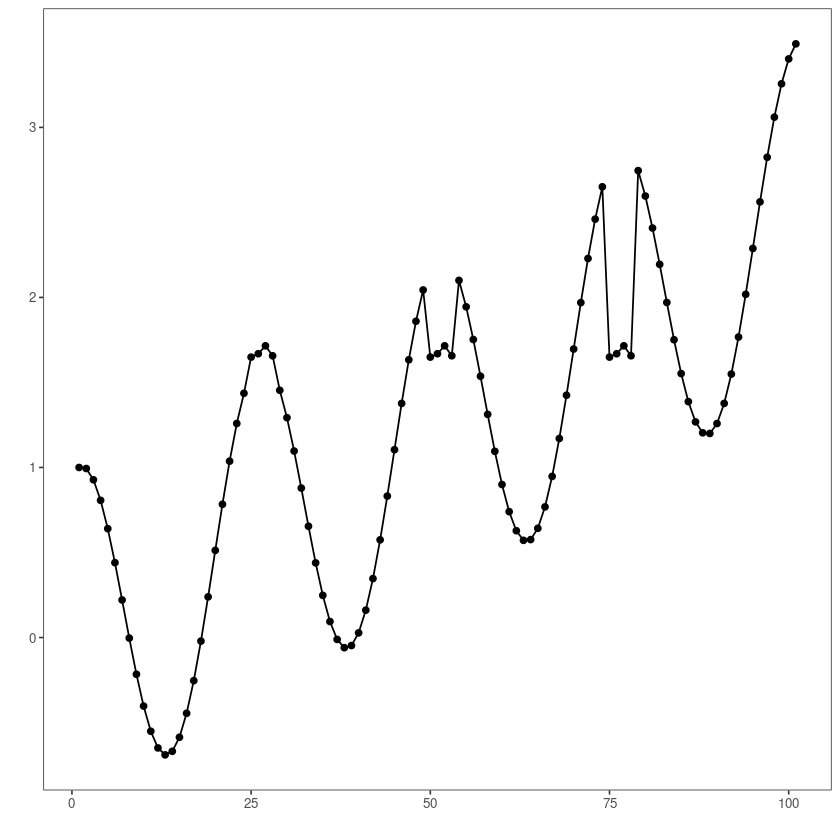

In [4]:
#ploting the time series
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing the method  
  model <- hmo_mp("scrimp", 4, 3)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections
  detection <- detect(model, dataset$serie)

Finished in 0.02 secs



In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event  type seq seqlen
1    6  TRUE motif   3      4
2   19  TRUE motif   2      4
3   25  TRUE motif   1      4
4   31  TRUE motif   3      4
5   44  TRUE motif   2      4
6   56  TRUE motif   3      4
7   69  TRUE motif   2      4
8   75  TRUE motif   1      4
9   81  TRUE motif   3      4
10  94  TRUE motif   2      4


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      2     8    
FALSE     1     90   


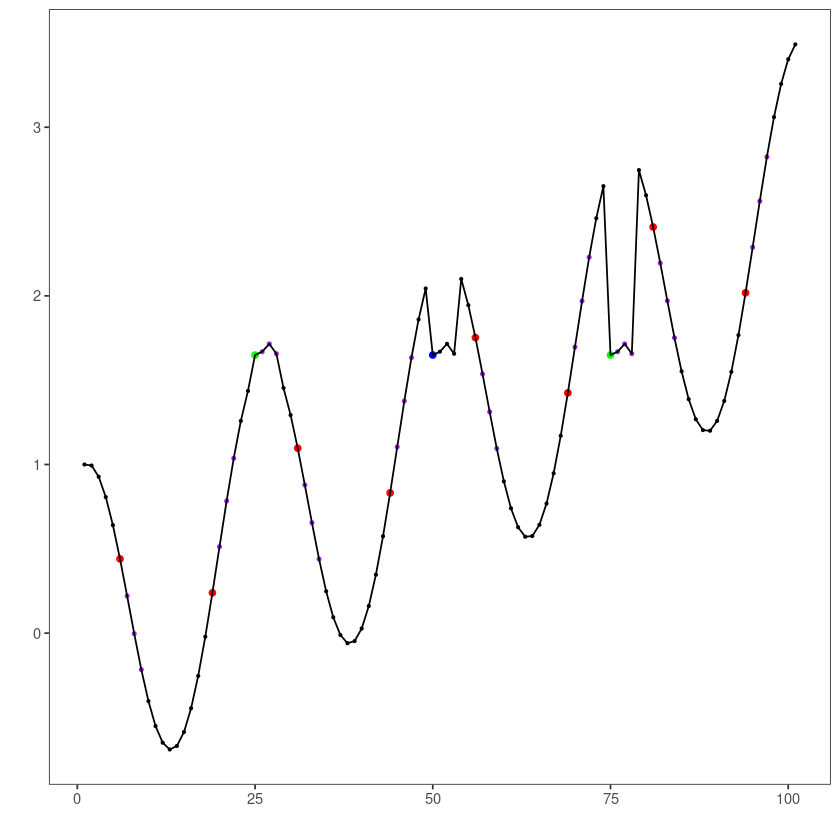

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)